# Principal Component Analysis in Villes Dataset

### Description: 
This code example tries to emulate the example of "Aprender de los Datos, El Análisis de Componentes Principales, una aproximación desde el Data Mining" book of "Tomas Aluja" and "Alain Morineau"

## Project: 
[r-examples](https://github.com/garciparedes/r-examples)

## Author: 
[Sergio García Prado](garciparedes.me)

### Date: 
2017-12

In [1]:
rm(list = ls())

In [2]:
column.index <- function(data, columns.name) {
  match(columns.name, colnames(data))
}

In [3]:
filter.by.factor <- function(data, columns.name, factor, columns.remove = TRUE) {
  col.index <- column.index(data, columns.name)
  indexer <- is.element(villes[, col.index], factor)
  if (columns.remove) {
    return(data[indexer, - col.index])
  } else {
    return(data[indexer, ])
  }
}

In [4]:
filter.by.columns <- function(data, columns.name, reverse = FALSE) {
  col.index <- column.index(data, columns.name)
  if (reverse){
    col.index <- - col.index
  }
  return(data[, col.index])
}

In [5]:
filter.complete <- function(data) {
  data[complete.cases(data),]
}

In [6]:
villes <- read.csv("./../datasets/villes.csv")
summary(villes)  

         Ciudad              Año                 Región.del.mundo
 AbuDhabi91 :  1   Edition 1991:53   CENTRAL EUROPE      :18     
 AbuDhabi94 :  1   edition 1994:53   NORD AMERIQUE       :14     
 Amsterdam91:  1                     NORD EUROPE         :12     
 Amsterdam94:  1                     SUD AMERIQUE        :12     
 Athenes91  :  1                     SUD ASIE ET AUSTRALI:12     
 Athenes94  :  1                     EST ASIE            :10     
 (Other)    :100                     (Other)             :28     
 Indice.precios.sin.alquiler Indice.precio.con.alquiler Indice.salarios.bruto
 Min.   : 30.3               Min.   : 30.20             Min.   :  2.10       
 1st Qu.: 52.8               1st Qu.: 55.90             1st Qu.: 14.40       
 Median : 67.5               Median : 71.30             Median : 43.00       
 Mean   : 68.1               Mean   : 71.76             Mean   : 41.83       
 3rd Qu.: 80.4               3rd Qu.: 85.60             3rd Qu.: 65.40       
 Max

In [7]:
head(villes)

Ciudad,Año,Región.del.mundo,Indice.precios.sin.alquiler,Indice.precio.con.alquiler,Indice.salarios.bruto,Indice.salarios.neto,Horas.anuales.de.trabajo,Vacaciones.anuales.pagadas,Poder.compra.bruto,⋯,Mecánico.Med.1,Obrero.constr.Med.1,Tornero.Med.1,Jefe.de.cocina.Med.1,Diretor.fábrica.Med.1,Ingeniero.Med.1,Cajero.banco.Med.1,Secretaria.dirección.Med.1,Dependienta.Med.1,Trabajador.text.Med.1
AbuDhabi91,Edition 1991,PROCHE ORIENT,NA,NA,NA,NA,NA,NA,NA,⋯,,,,,,,,,,
AbuDhabi94,edition 1994,PROCHE ORIENT,71.3,78.1,29.9,38.0,2100,28.9,42.0,⋯,0.5770 0.68,0.1330 0.26,0.1312 0.75,2.2949 2.48,6.5651 9.13,3.9393 4.37,3.2258 3.50,1.0769 1.11,1.0769 1.13,0.1312 0.36
Amsterdam91,Edition 1991,CENTRAL EUROPE,65.6,65.7,56.9,49.0,1714,31.9,86.7,⋯,0.8876 0.90,0.9425 0.96,1.0820 1.09,1.0602 1.07,1.9101 1.94,1.8450 1.88,1.0949 1.11,1.1070 1.12,0.8820 0.90,0.8074 0.83
Amsterdam94,edition 1994,CENTRAL EUROPE,68.8,70.3,61.4,53.7,1792,27.5,89.3,⋯,0.8655 0.87,0.7819 0.79,1.3147 1.34,0.8712 0.95,1.9935 2.04,1.9597 1.98,1.3495 1.36,1.0202 1.03,0.7619 0.77,0.8074 0.83
Athenes91,Edition 1991,SUD EUROPE,53.8,55.6,30.2,30.4,1792,23.5,56.1,⋯,0.9784 1.00,1.1152 1.13,1.6435 1.88,1.5613 1.69,1.5623 1.58,1.6746 1.72,1.1088 1.14,0.7567 0.83,0.5198 0.54,0.6574 0.66
Athenes94,edition 1994,SUD EUROPE,54.4,56.7,27.7,28.5,1775,24.5,50.9,⋯,0.6898 0.75,1.1152 1.13,1.0959 1.10,1.2568 1.27,1.4141 1.45,1.4946 1.54,1.2647 1.31,1.0202 1.03,0.6595 0.68,0.7037 0.71


In [8]:
cols <- c("Ciudad", "Región.del.mundo", "Maestro", "Chófer.de.autobús",
          "Mecánico.de.coche", "Obrero.de.la.construcción", "Tornero", 
          "Jefe.de.cocina", "Director.de.fábrica", "Ingeniero", "Cajero.banco",
          "Secretaria.de.dirección", "Dependienta", "Trabajador.textil")

villes.use <- filter.complete(filter.by.columns(filter.by.factor(
  villes, "Año", "edition 1994"), cols))[-1,]

head(villes.use)

,Ciudad,Región.del.mundo,Maestro,Chófer.de.autobús,Mecánico.de.coche,Obrero.de.la.construcción,Tornero,Jefe.de.cocina,Director.de.fábrica,Ingeniero,Cajero.banco,Secretaria.de.dirección,Dependienta,Trabajador.textil
4,Amsterdam94,CENTRAL EUROPE,23800,24900,14300,13000,22000,15600,33600,32600,22500,17000,12700,13700
6,Athenes94,SUD EUROPE,10100,11300,6000,9700,9600,11000,12300,13000,11000,8900,5800,6200
8,Bangkok94,SUD ASIE ET AUSTRALI,4100,3400,2600,1700,6600,8500,27300,17900,12800,7100,1700,1900
10,Bogota94,SUD AMERIQUE,4100,4100,6500,1700,5500,11600,31500,19000,8400,9100,3100,5100
12,Bombay94,SUD ASIE ET AUSTRALI,1600,1700,1300,800,1400,2700,4300,2100,1800,2200,1100,1300
14,Bruxelles94,CENTRAL EUROPE,16000,14900,12200,13200,18100,19000,30300,24600,20600,14900,12100,11800


In [9]:
print(dim(villes.use))

[1] 50 14


In [10]:
?princomp

In [11]:
villes.use.pca <- princomp(scale(filter.by.columns(
  villes.use, c("Ciudad", "Región.del.mundo"), reverse = TRUE)))

In [12]:
print(villes.use.pca)

Call:
princomp(x = scale(filter.by.columns(villes.use, c("Ciudad", 
    "Región.del.mundo"), reverse = TRUE)))

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
3.2068574 0.7102643 0.5500093 0.4141291 0.3917748 0.3216623 0.2647213 0.2292270 
   Comp.9   Comp.10   Comp.11   Comp.12 
0.1886502 0.1781175 0.1683167 0.1495181 

 12  variables and  50 observations.


## Variance Ratio by Component

In [13]:
(villes.use.pca$sdev ^ 2) / sum(villes.use.pca$sdev ^ 2)

Comp.1      Comp.2      Comp.3      Comp.4      Comp.5      Comp.6 
0.874484194 0.042897569 0.025723657 0.014583578 0.013051654 0.008798181 
     Comp.7      Comp.8      Comp.9     Comp.10     Comp.11     Comp.12 
0.005958962 0.004468112 0.003026267 0.002697775 0.002409058 0.001900991

### Proyection Weights

In [14]:
villes.use.pca$loadings


Loadings:
                          Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
Maestro                   -0.292         0.319  0.432 -0.316 -0.330  0.160
Chófer.de.autobús         -0.298         0.254  0.212 -0.224 -0.369       
Mecánico.de.coche         -0.288 -0.393 -0.203  0.187               -0.335
Obrero.de.la.construcción -0.284 -0.469         0.124         0.445       
Tornero                   -0.299 -0.190               -0.288  0.158       
Jefe.de.cocina            -0.272        -0.796        -0.155 -0.382       
Director.de.fábrica       -0.274  0.514 -0.156        -0.371  0.593  0.231
Ingeniero                 -0.288  0.157  0.124 -0.728 -0.173 -0.116 -0.230
Cajero.banco              -0.276  0.490         0.242  0.542        -0.458
Secretaria.de.dirección   -0.301  0.109  0.103 -0.114  0.256              
Dependienta               -0.296        -0.129         0.422         0.702
Trabajador.textil         -0.294 -0.201  0.287 -0.327  0.167         0.171
              

## Absolute Contributions

In [15]:
villes.use.pca.ctr.abs <- t(t(villes.use.pca$scores) ^ 2 / (dim(villes.use)[1] * villes.use.pca$sdev ^ 2))
data.frame(villes.use[, "Ciudad"], round(villes.use.pca.ctr.abs, digits = 6))

,villes.use....Ciudad..,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
4,Amsterdam94,0.005063,0.000124,0.025958,0.003131,0.001145,0.015103,0.001985,0.001105,0.017951,0.000078,0.047753,0.020717
6,Athenes94,0.006953,0.006014,0.001863,0.006913,0.000735,0.003426,0.000067,0.066314,0.003618,0.005056,0.003695,0.073802
8,Bangkok94,0.016265,0.031828,0.000256,0.004712,0.011628,0.024432,0.033181,0.000143,0.000020,0.001898,0.000853,0.002625
10,Bogota94,0.011182,0.015105,0.007339,0.022430,0.014537,0.019603,0.001225,0.000100,0.043337,0.088800,0.002089,0.044929
12,Bombay94,0.040131,0.001055,0.005596,0.015993,0.000017,0.000041,0.001273,0.004449,0.000555,0.001220,0.005470,0.002250
14,Bruxelles94,0.000829,0.000901,0.003855,0.002529,0.007964,0.000005,0.011059,0.023761,0.000454,0.035081,0.016175,0.001645
16,Budapest94,0.033638,0.000671,0.002334,0.014110,0.000000,0.000012,0.000005,0.005993,0.012016,0.000127,0.005178,0.001236
18,BuenosAires94,0.001300,0.075958,0.001421,0.013102,0.306022,0.026325,0.015033,0.025350,0.047467,0.000287,0.006911,0.058964
22,Caracas94,0.034499,0.000153,0.000026,0.000139,0.000423,0.005987,0.000813,0.001926,0.000438,0.000492,0.014143,0.004401
24,Chicago94,0.038544,0.047955,0.000948,0.059058,0.158630,0.075696,0.057529,0.014044,0.025009,0.001238,0.003418,0.106706


## Relative Contributions

In [16]:

villes.use.pca.ctr.rel <- ((villes.use.pca$scores) ^ 2 / (rowSums(villes.use.pca$scores ^ 2)))
data.frame(villes.use[, "Ciudad"], round(villes.use.pca.ctr.rel, digits = 6))

,villes.use....Ciudad..,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
4,Amsterdam94,0.802104,0.000964,0.120981,0.008272,0.002707,0.024075,0.002143,0.000894,0.009842,0.000038,0.020843,0.007135
6,Athenes94,0.868955,0.036867,0.006850,0.014408,0.001372,0.004308,0.000057,0.042346,0.001565,0.001949,0.001272,0.020051
8,Bangkok94,0.875755,0.084064,0.000405,0.004231,0.009344,0.013235,0.012174,0.000039,0.000004,0.000315,0.000127,0.000307
10,Bogota94,0.830555,0.055036,0.016035,0.027784,0.016115,0.014649,0.000620,0.000038,0.011139,0.020347,0.000428,0.007254
12,Bombay94,0.986704,0.001272,0.004047,0.006558,0.000006,0.000010,0.000213,0.000559,0.000047,0.000093,0.000371,0.000120
14,Bruxelles94,0.551913,0.029414,0.075464,0.028068,0.079092,0.000032,0.050144,0.080785,0.001045,0.072013,0.029650,0.002380
16,Budapest94,0.987477,0.000966,0.002016,0.006908,0.000000,0.000004,0.000001,0.000899,0.001221,0.000012,0.000419,0.000079
18,BuenosAires94,0.121935,0.349436,0.003919,0.020491,0.428333,0.024839,0.009607,0.012147,0.015405,0.000083,0.001785,0.012021
22,Caracas94,0.995841,0.000216,0.000022,0.000067,0.000182,0.001739,0.000160,0.000284,0.000044,0.000044,0.001125,0.000276
24,Chicago94,0.840951,0.051325,0.000608,0.021488,0.051655,0.016616,0.008553,0.001566,0.001888,0.000083,0.000205,0.005061


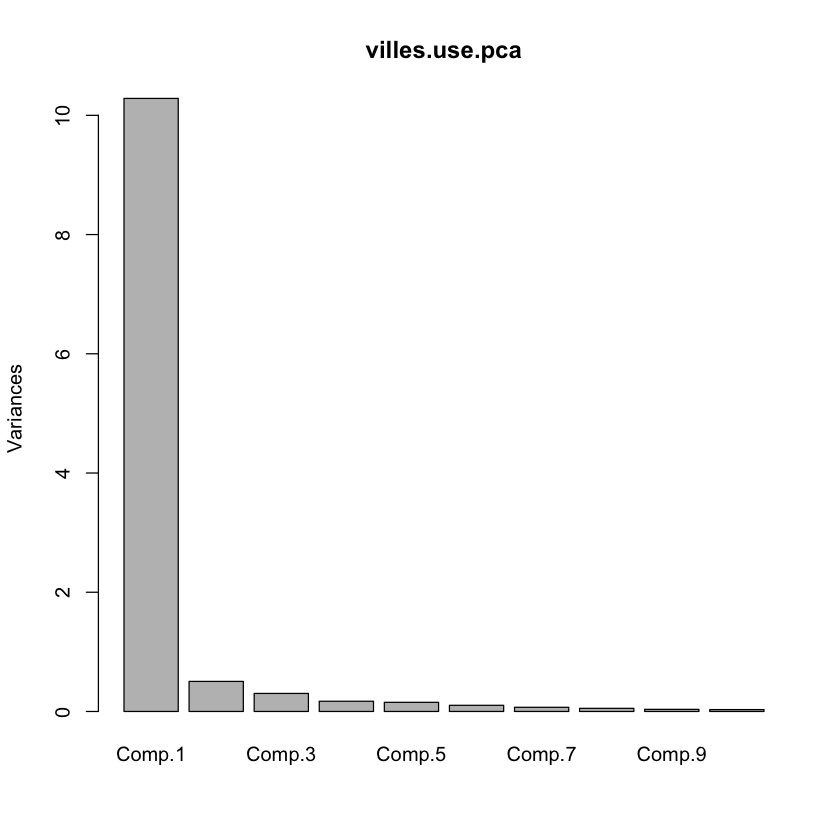

In [17]:
plot(villes.use.pca)

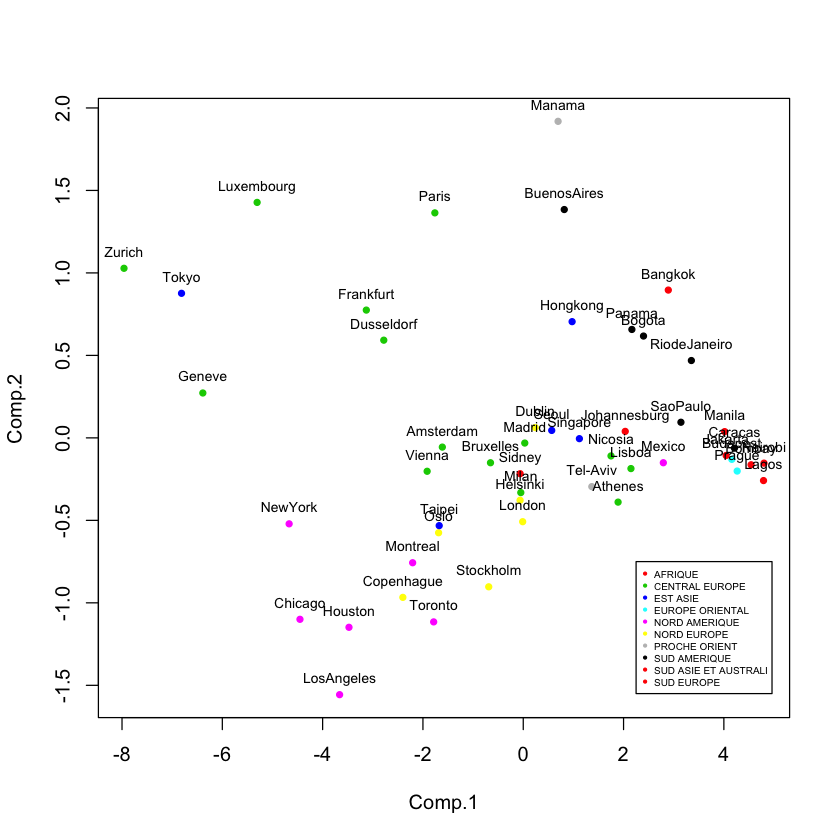

In [18]:
plot(villes.use.pca$scores[,1:2], pch = 20,
     col = as.numeric(villes.use[, "Región.del.mundo"]) + 1)
text(villes.use.pca$scores[,1:2], cex = 0.7, pos = 3,
     labels = sub("94", "", villes.use[,"Ciudad"]))
legend(2.25,-0.75,levels(villes.use[, "Región.del.mundo"]), pch=20,cex=0.5, col=2:nlevels(villes.use[, "Región.del.mundo"]))